# Welcome To The Data Analysis Process - Case Study 1
In this first case study, you'll perform the entire data analysis process to investigate a dataset on wine quality. Along the way, you'll explore new ways of manipulating data with NumPy and Pandas, as well as powerful visualization tools with Matplotlib.

We're going to investigate this [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) on physicochemical properties and quality ratings of red and white wine samples. Let's take a closer look at its attributes and pose some questions for our analysis!

## 1. Asking Questions

* What chemical characteristics are most important in predicting the quality of wine?
* Is a certain type of wine (red or white) associated with higher quality?
* Do wines with higher alcoholic content receive better ratings?
* Do sweeter wines (more residual sugar) receive better ratings?
* What level of acidity is associated with the highest quality?

*Note:* Reading CSV files isn't always the same process - you won't always know what to expect. Sometimes there could be different delimiters, missing column labels, blank lines, comments, header text, etc. Most of the time, quick trial and error with Pandas does the trick. Alternatively, you can inspect the file with a text editor or spreadsheet program, like Google Sheets. Although, this is not recommended for large files, as they could really slow or crash the program. A [better way](https://askubuntu.com/questions/261900/how-do-i-open-a-text-file-in-my-terminal) to inspect large files would be with your terminal.

In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

red_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                    sep = ';')
white_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                      sep = ';')

In [9]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Attributes in Each Dataset:
**Physicochemical Properties**
1. Fixed Acidity
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

**Quality Rating**  
12 . Quality - Score between 0 and 10 (median of at least 3 evaluations made by wine experts)

In [17]:
# The size of datasets
print("Red Wine dataset has {} samples\n\nWhite Wine dataset has {} samples".
      format(red_df.shape[0], white_df.shape[0]))

Red Wine dataset has 1599 samples

White Wine dataset has 4898 samples


In [18]:
# Columns
print("Red Wine dataset has {} columns\n\nWhite Wine dataset has {} columns".
      format(red_df.shape[1], white_df.shape[1]))

Red Wine dataset has 12 columns

White Wine dataset has 12 columns


In [31]:
# Missing values
print("Missing values in Red Wine dataset:\n\n{}\n\nMissing values in White Wine dataset:\n\n{}".
      format(red_df.isna().sum() , white_df.isna().sum()))

Missing values in Red Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values in White Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [26]:
# Duplicates
print("Red Wine dataset has {} duplicated values\n\nWhite Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Red Wine dataset has 240 duplicated values

White Wine dataset has 937 duplicated values


In [ ]:
# View the duplicates

In [30]:
red_df = red_df.drop_duplicates();
white_df = white_df.drop_duplicates();

print("Now Red Wine dataset has {} duplicated values\n\nAnd White Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Now Red Wine dataset has 0 duplicated values

And White Wine dataset has 0 duplicated values


In [36]:
# Unique values
print("Unique values in Red Wine dataset:\n\n{}\n\nUnique values in White Wine dataset:\n\n{}".
      format(red_df.nunique() , white_df.nunique()))

Unique values in Red Wine dataset:

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Unique values in White Wine dataset:

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [37]:
# Descriptive statistics
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
# Descriptive statistics
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Appending with `NumPy`

You can combine the red and white datasets to make your analysis more efficient. Use NumPy to create a new column that preserves color information, and then use pandas to combine the dataframes.

## Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [39]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [40]:
red_df['color'] = color_red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


Do the same for the white dataframe and use `head()` to confirm the change.

In [41]:
white_df['color'] = color_white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


## Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. Make sure to save your work in this notebook! You'll come back to this later.

In [43]:
# append dataframes
wine_df = red_df.append(white_df)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


## Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Remember, set `index=False` to avoid saving with an unnamed column!

In [44]:
wine_df.to_csv('winequality_edited.csv', index=False)

# Exploring with Visuals
Perform exploratory data analysis (EDA) on your newly combined dataframe. Create some visuals to answer these quiz questions below.

* Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol
* Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

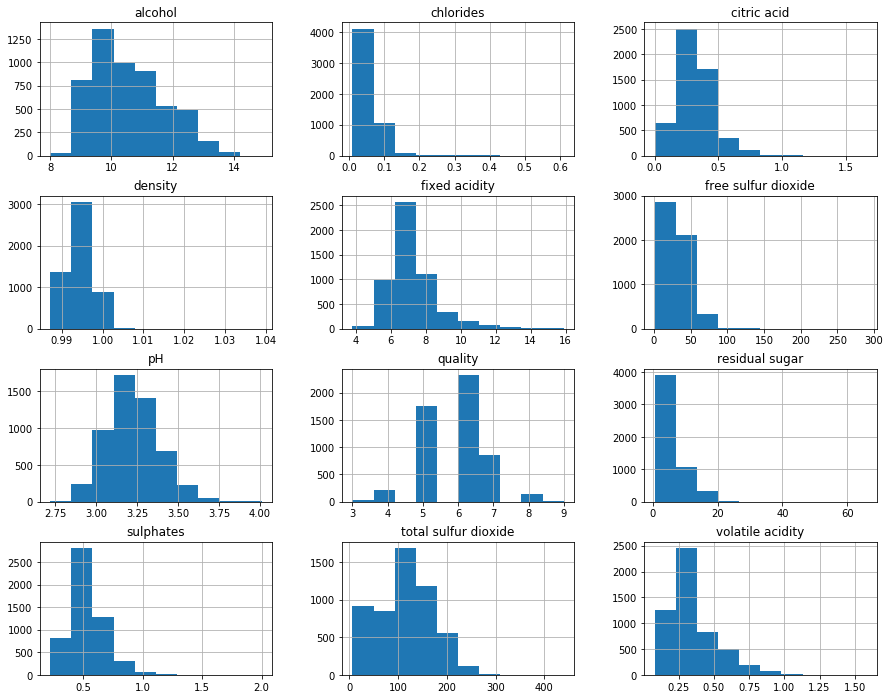

In [52]:
wine_df.hist(figsize=(15,12));

In [57]:
# Scatter plots

# Summative statistics: `Pandas GroupBy`
## Drawing Conclusions Using Groupby
Investigate two questions about this data using pandas' `groupby` function. Here are tips for answering each question:

**Q1: Is a certain type of wine (red or white) associated with higher quality?**
For this question, compare the average quality of red wine with the average quality of white wine with `groupby`. To do this group by color and then find the mean quality of each group.

**Q2: What level of acidity (pH value) receives the highest average rating?**
This question is more tricky because unlike color, which has clear categories you can group by (red and white) pH is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. pandas' cut function let's you "cut" data in groups. Using this, create a new column called `acidity_levels` with these categories:

**Acidity Levels:**
1. High: Lowest 25% of pH values
1. Moderately High: 25% - 50% of pH values
1. Medium: 50% - 75% of pH values
1. Low: 75% - max pH value
Here, the data is being split at the 25th, 50th, and 75th percentile. Remember, you can get these numbers with pandas' `describe()`! After you create these four categories, you'll be able to use groupby to get the mean quality rating for each acidity level.

### Is a certain type of wine associated with higher quality?

In [60]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby('color').mean().quality

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

### What level of acidity receives the highest average rating?

In [62]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe().pH

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [63]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [64]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [65]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [67]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.728024
mod_high    5.766917
medium      5.840183
low         5.847470
Name: quality, dtype: float64

In [69]:
# Save changes for the next section
wine_df.to_csv('winequality_edited.csv', index=False)

## Pandas Query
Another useful function that we’re going to use is [pandas' `query`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html) function.

In the previous lesson, we selected rows in a dataframe by indexing with a mask. Here are those same examples, along with equivalent statements that use `query()`.
```python
# selecting malignant records in cancer data
df_m = df[df['diagnosis'] == 'M']
df_m = df.query('diagnosis == "M"')
```
```python
# selecting records of people making over $50K
df_a = df[df['income'] == ' >50K']
df_a = df.query('income == " >50K"')
```
The examples above filtered columns containing strings. You can also use query to filter columns containing numeric data like this.

```python
# selecting records in cancer data with radius greater than the median
df_h = df[df['radius'] > 13.375]
df_h = df.query('radius > 13.375')
```

### Do wines with higher alcoholic content receive better ratings?

In [71]:
# get the median amount of alcohol content
wine_df.alcohol.median()

10.4

In [72]:
# select samples with alcohol content less than the median
low_alcohol = wine_df[wine_df.alcohol < 10.3]

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df[wine_df.alcohol >= 10.3]

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [73]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.428057553956834, 6.122072391767211)

### Do sweeter wines receive better ratings?

In [76]:
# get the median amount of residual sugar
wine_df['residual sugar'].median()

2.7

In [79]:
# select samples with residual sugar less than the median
low_sugar = wine_df[wine_df['residual sugar'] < 3]

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df[wine_df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [80]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.793610911701364, 5.797947908445146)

# Further visualisations with `Seaborn`

You can make aesthetically pleasing data visualizations with [seaborn](https://seaborn.pydata.org/). Here are some cool [examples](https://seaborn.pydata.org/examples/index.html).